In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import preprocessing 
%matplotlib inline

In [2]:
pip install -U imbalanced-learn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df= pd.read_csv("/Users/mananbhatt/Desktop/MANIPAL/ADG/CAR_ADG/car_price.csv")

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
drive_location=df['enginelocation'].value_counts()
drive_location




#to_frame() function create a dataFrame from the given index with a column containing the Index. By default, the original Index is reused in the new dataframe. To reinforce a new index for the newly created dataframe, we set the index parameter of the function to be false.

front    202
rear       3
Name: enginelocation, dtype: int64

In [6]:
drive_location=df['enginelocation'].value_counts().to_frame()
drive_location.rename(columns={'enginelocation':'Engine Location'}, inplace=True)
drive_location

,Engine Location
front,202
rear,3


In [7]:
drive_carbody= df['carbody'].value_counts().to_frame()
drive_carbody

,carbody
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


Text(0.5, 1.0, 'CAR BODY-PRICE')

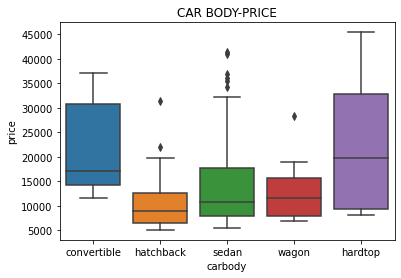

In [8]:
sns.boxplot(x= "carbody", y= "price", data=df).set_title('CAR BODY-PRICE')

#In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Text(0.5, 1.0, 'Scatter Plot For ENGINE SIZE-PRICE')

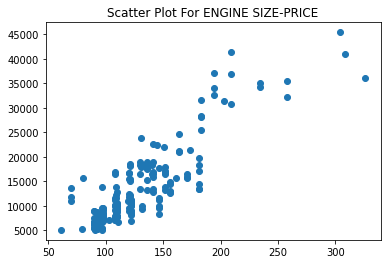

In [9]:
plt.scatter(x="enginesize", y="price", data=df)
plt.title("Scatter Plot For ENGINE SIZE-PRICE")

In [10]:
df_test= df[['carbody','aspiration','price']]
df_group= df_test.groupby(['carbody','aspiration'], as_index= False).mean()
df_group.sort_values(by='price',ascending= True,inplace= True)
df_group

,carbody,aspiration,price
3,hatchback,std,9699.605263
7,wagon,std,10973.600000
4,hatchback,turbo,13345.243615
5,sedan,std,13660.371795
6,sedan,turbo,17307.833333
8,wagon,turbo,17965.400000
1,hardtop,std,21356.000000
0,convertible,std,21890.500000
2,hardtop,turbo,28176.000000


In [11]:
df_pivot= df_group.pivot(index='carbody', columns='aspiration')
df_pivot

price              
aspiration            std         turbo
carbody                                
convertible  21890.500000           NaN
hardtop      21356.000000  28176.000000
hatchback     9699.605263  13345.243615
sedan        13660.371795  17307.833333
wagon        10973.600000  17965.400000

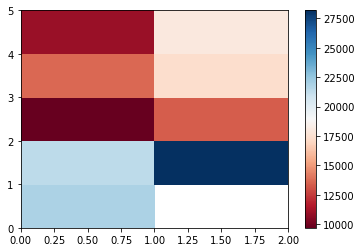

In [12]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 53424.869851558346)

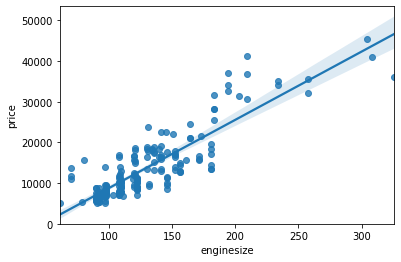

In [13]:
sns.regplot('enginesize', 'price', data=df)
plt.ylim(0,)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 48222.30607454797)

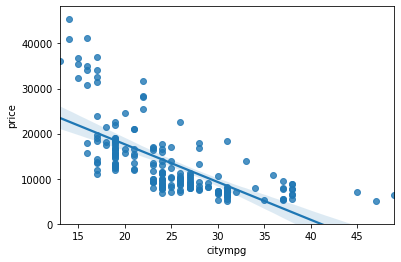

In [14]:
sns.regplot('citympg', 'price', data=df)
plt.ylim(0,)
#steapper the slope more reliable is the correlation between the values.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 48225.416528445385)

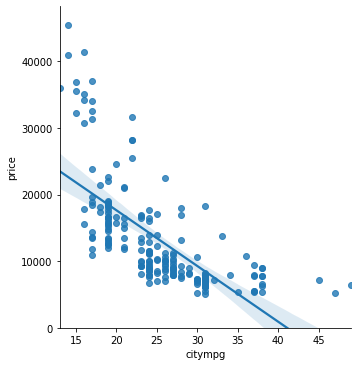

In [15]:
sns.lmplot('citympg', 'price', data=df)
plt.ylim(0,)

In [16]:
#Peasrson Correlation:-
# 1, -1 , 0 refers to correlation coefficient of correlation between parameter 
#with having +ve relation, -ve relation and no relation respectively
#P-value:- 
# <0.001- Strong
# <0.05- Moderate
# <0.1- Weak 
# >0.1- No Certainity

pearson_coef, p_value= stats.pearsonr(df['horsepower'], df['price'])


In [17]:
pearson_coef

0.8081388225362217

In [18]:
p_value

1.4834365732940913e-48

In [19]:
lm=LinearRegression()
X= df[['highwaympg']]
Y= df[['price']]
lm.fit(X,Y)

LinearRegression()

In [20]:
Predict= lm.predict(X)

In [21]:
Predict

array([[16312.47322074],
       [16312.47322074],
       [17121.74674903],
       [13884.65263588],
       [20358.84086218],
       [17931.02027732],
       [17931.02027732],
       [17931.02027732],
       [21977.38791875],
       [20358.84086218],
       [14693.92616417],
       [14693.92616417],
       [15503.19969246],
       [15503.19969246],
       [17931.02027732],
       [20358.84086218],
       [20358.84086218],
       [21977.38791875],
       [-4728.63851471],
       [ 3364.09676816],
       [ 3364.09676816],
       [ 4982.64382473],
       [ 7410.46440959],
       [13884.65263588],
       [ 7410.46440959],
       [ 7410.46440959],
       [ 7410.46440959],
       [13884.65263588],
       [13884.65263588],
       [18740.2938056 ],
       [-5537.912043  ],
       [ 7410.46440959],
       [ 4173.37029644],
       [10647.55852274],
       [10647.55852274],
       [10647.55852274],
       [10647.55852274],
       [11456.83205102],
       [11456.83205102],
       [11456.83205102],


In [22]:
inter= lm.intercept_
coef= lm.coef_

In [23]:
inter

array([38162.85848448])

In [24]:
coef

array([[-809.27352829]])

In [25]:
z= df[['horsepower','curbweight','enginesize','highwaympg']]
#multiple linear regression, where following parameters are used as predictors to predict price.
# y= b0+ b1x1 + b2x2 + b3x3 + b4x4   

In [26]:
lm.fit(z, df.price)

LinearRegression()

In [27]:
pred= lm.predict(z)

In [28]:
pred

array([13705.65874827, 13705.65874827, 19012.54779171, 10642.39806986,
       15485.97998725, 13878.04669385, 15438.4915069 , 15947.83551115,
       17515.45953502, 18493.00642633, 10735.11919185, 10735.11919185,
       17832.21534741, 18086.88734954, 19307.56818189, 26915.76024991,
       27610.32025572, 28107.69680797,   846.62315969,  5778.49625251,
        5940.56025386,  5601.440936  ,  5479.30575713,  8765.12022023,
        5900.67216066,  6002.54096151,  6002.54096151,  9056.83542267,
       11899.86091497, 18734.27863849,  5016.84289539,  5800.31165484,
        4132.47216325,  6197.74315437,  6271.82955498,  6521.87115707,
        6586.69675762,  9540.40555478,  9785.81675683,  9855.27275741,
       10170.13996004, 11183.90351219, 10457.1635524 ,  9508.34241948,
        5778.49625251,  5940.56025386, 12637.43939451, 34401.47858734,
       34401.47858734, 43915.82677543,  5341.8332956 ,  5673.11938002,
        5696.27138021,  5881.48738176,  5904.63938196,  7279.39999913,
      

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highwaympg', ylabel='price'>

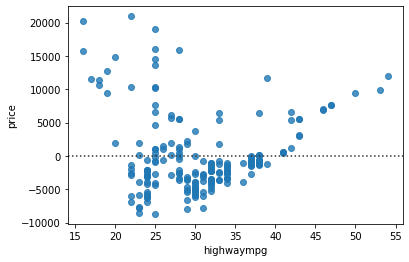

In [29]:
sns.residplot(df.highwaympg, df.price)
#Residual plot is the plot of the error, the Y-axis plot the difference between the predicted value and the actual value. 
#If there some relation in the residplot then the parameters predicted values do not match the actual values, ideally the grpah shoould be a straight line passing through X-axis. 
#A parabola or increasing graph is not a good sign.

In [30]:
#if the linear model does not fit the data then help of polynomial is taken.

f=np.polyfit(df.highwaympg,df.price,3)
p= np.poly1d(f)
p

poly1d([-1.49603403e+00,  1.97860523e+02, -8.71437435e+03,  1.35089693e+05])

In [31]:
pr= PolynomialFeatures(degree=2, include_bias= False)
x_polly= pr.fit_transform(df[['horsepower','curbweight']])
x_polly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

In [32]:
# MSE- mean square error, as the name suggest mean of the sqaure of the error between predicted and the actual values
#sklearn has directory for this .

#R^2- coefficient of determination,  R^2= (1- MSE of regression line/ MSE of average of data)


In [33]:
cdf= df[['enginesize','highwaympg','horsepower','price']]
cdf.head(10)

,enginesize,highwaympg,horsepower,price
0,130,27,111,13495.000
1,130,27,111,16500.000
2,152,26,154,16500.000
3,109,30,102,13950.000
4,136,22,115,17450.000
5,136,25,110,15250.000
6,136,25,110,17710.000
7,136,25,110,18920.000
8,131,20,140,23875.000
9,131,22,160,17859.167


In [34]:
msk = np.random.rand(len(df)) < 0.8
train= cdf[msk]
test= cdf[~msk]

In [35]:
train_x = np.asanyarray(train[['enginesize']])
train_y = np.asanyarray(train[['highwaympg']])

test_x = np.asanyarray(train[['enginesize']])
test_y = np.asanyarray(train[['highwaympg']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[1.00000e+00, 1.30000e+02, 1.69000e+04],
       [1.00000e+00, 1.30000e+02, 1.69000e+04],
       [1.00000e+00, 1.52000e+02, 2.31040e+04],
       [1.00000e+00, 1.09000e+02, 1.18810e+04],
       [1.00000e+00, 1.36000e+02, 1.84960e+04],
       [1.00000e+00, 1.36000e+02, 1.84960e+04],
       [1.00000e+00, 1.36000e+02, 1.84960e+04],
       [1.00000e+00, 1.36000e+02, 1.84960e+04],
       [1.00000e+00, 1.31000e+02, 1.71610e+04],
       [1.00000e+00, 1.08000e+02, 1.16640e+04],
       [1.00000e+00, 1.08000e+02, 1.16640e+04],
       [1.00000e+00, 1.64000e+02, 2.68960e+04],
       [1.00000e+00, 1.64000e+02, 2.68960e+04],
       [1.00000e+00, 1.64000e+02, 2.68960e+04],
       [1.00000e+00, 2.09000e+02, 4.36810e+04],
       [1.00000e+00, 2.09000e+02, 4.36810e+04],
       [1.00000e+00, 2.09000e+02, 4.36810e+04],
       [1.00000e+00, 6.10000e+01, 3.72100e+03],
       [1.00000e+00, 9.00000e+01, 8.10000e+03],
       [1.00000e+00, 9.00000e+01, 8.10000e+03],
       [1.00000e+00, 9.00000e+01, 8.1000

In [36]:
clf= linear_model.LinearRegression()
train_y_= clf.fit(train_x_poly, train_y)
clf.coef_



array([[ 0.        , -0.23002482,  0.00036564]])

In [37]:
clf.intercept_


array([53.26912328])

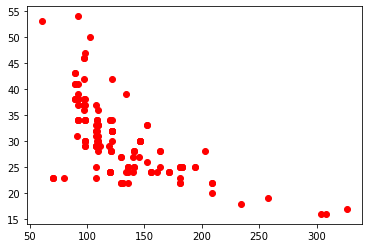

In [38]:
plt.scatter(train.enginesize, train.highwaympg, color= 'red')


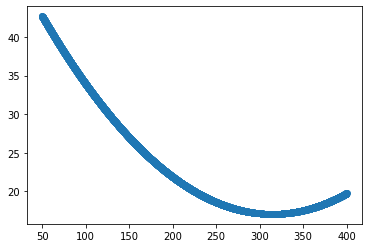

In [39]:
XX= np.arange(50, 400, 0.1)
YY= clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX,YY)
plt.scatter(XX,YY)

In [40]:
from sklearn.metrics import r2_score
test_x_poly= poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 3.64
Residual sum of squares (MSE): 26.03
R2-score: 0.46


In [41]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

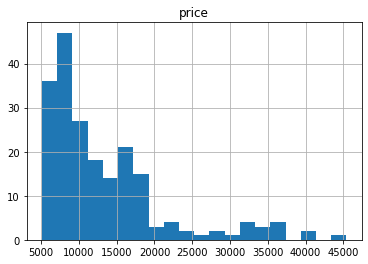

In [42]:
df.hist(column= 'price', bins= 20)

In [43]:
X= df[['enginesize','stroke','boreratio','peakrpm','horsepower']]

In [44]:
X[0:5]

,enginesize,stroke,boreratio,peakrpm,horsepower
0,130,2.68,3.47,5000,111
1,130,2.68,3.47,5000,111
2,152,3.47,2.68,5000,154
3,109,3.40,3.19,5500,102
4,136,3.40,3.19,5500,115


In [45]:
X.values

array([[1.30e+02, 2.68e+00, 3.47e+00, 5.00e+03, 1.11e+02],
       [1.30e+02, 2.68e+00, 3.47e+00, 5.00e+03, 1.11e+02],
       [1.52e+02, 3.47e+00, 2.68e+00, 5.00e+03, 1.54e+02],
       ...,
       [1.73e+02, 2.87e+00, 3.58e+00, 5.50e+03, 1.34e+02],
       [1.45e+02, 3.40e+00, 3.01e+00, 4.80e+03, 1.06e+02],
       [1.41e+02, 3.15e+00, 3.78e+00, 5.40e+03, 1.14e+02]])

In [46]:
Y= df.carbody

In [47]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.07444893, -1.83937734,  0.51907138, -0.26296022,  0.17448278],
       [ 0.07444893, -1.83937734,  0.51907138, -0.26296022,  0.17448278],
       [ 0.60404617,  0.68594616, -2.40488029, -0.26296022,  1.26453643],
       [-0.43107572,  0.46218332, -0.51726592,  0.78785546, -0.05366798],
       [ 0.21888454,  0.46218332, -0.51726592,  0.78785546,  0.27588312]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (164, 5) (164,)
Test set: (41, 5) (41,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k=20

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=20)

In [51]:
yhat= neigh.predict(X_test)


In [52]:
yhat[0:5]

array(['sedan', 'hatchback', 'hatchback', 'sedan', 'sedan'], dtype=object)

In [53]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.5670731707317073
Test set Accuracy:  0.6341463414634146


In [54]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51219512, 0.56097561, 0.56097561, 0.48780488, 0.53658537,
       0.58536585, 0.58536585, 0.56097561, 0.6097561 , 0.58536585,
       0.58536585, 0.6097561 , 0.63414634, 0.63414634, 0.63414634,
       0.63414634, 0.6097561 , 0.63414634, 0.6097561 ])

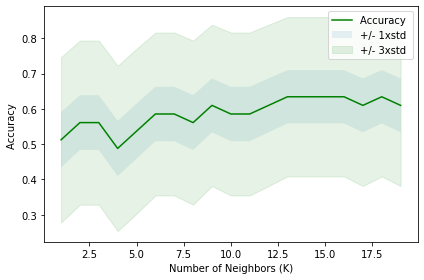

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6341463414634146 with k= 13


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [63]:
X= df[['doornumber','carbody','aspiration','drivewheel', 'price']]
X[0:5].values

array([['two', 'convertible', 'std', 'rwd', 13495.0],
       ['two', 'convertible', 'std', 'rwd', 16500.0],
       ['two', 'hatchback', 'std', 'rwd', 16500.0],
       ['four', 'sedan', 'std', 'fwd', 13950.0],
       ['four', 'sedan', 'std', '4wd', 17450.0]], dtype=object)

In [66]:
pd.value_counts(df.carbody)

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [67]:
pd.value_counts(df.aspiration)

std      168
turbo     37
Name: aspiration, dtype: int64

In [68]:
pd.value_counts(df.drivewheel)

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [71]:
from sklearn import preprocessing

le_carbody= preprocessing.LabelEncoder()
le_carbody.fit(['sedan', 'hatchback','wagon','hardtop','convertible'])
X[:4]= le_carbody.transform(X[:4])

le_doornumber= preprocessing.LabelEncoder()
le_doornumber.fit(['two','four'])
X[:,1]= le_doornumber(X[:,1])

le_aspiration= preprocessing.LabelEncoder()
le_aspiration.fit(['std','turbo'])
X[:,1]= le_aspiration.transform(X[:,1])

le_drivewheel= preprocessing.LabelEncoder()
le_drivewheel.fit(['fwd','rwd', '4wd'])
X[:,2]= le_drivewheel.transform(X[:,2])

ValueError: y should be a 1d array, got an array of shape (4, 5) instead.